In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**<h3> List of Indicators used</h3>**

**<h4> Poverty </h4>**

1. Gini Index

2. Poverty Wealth Gap percentages below the following poverty lines
    * at $2.15 a day
    * at $3.65 a day
    * at $6.85 a day
    
3. Poverty Headcount percentages on the following poverty lines
    * at $2.15 a day
    * at $3.65 a day
    * at $6.85 a day

**<h4> Health </h4>**

4. Life Expectancy
5. Number of physicians per 1000 people
6. Number of hospital beds per 1000 people 
7. Cause of death (% of total)
    * by non-communicable diseases
    * by injury
8. Population ages 65 and above (% of total population)

**<h4>Education</h4>**

9. Percentage of population ages 25+ who have completed the following
    * Short-cycle tertiary
    * primary
    * lower secondary
    * Atleast Master's or equivalent
    * Atleast Doctoral or equivalent

**<h4>Economy</h4>**

10. GDP (current USD)

11. Unemployment

12. Inflation

13. Population



In [2]:
df = pd.read_csv('../data/interim/radius3.csv',index_col=[0]).reset_index(drop=True)

df.head()

,Country Name,Year,"EA, at least completed lower secondary","EA, Doctoral or equivalent",Poverty headcount ratio at $3.65,Inflation,Poverty headcount ratio at $6.85,Gini index,GDP (current US$),Poverty gap at $2.15,...,"EA, at least completed short-cycle tertiary","Population, total",Population ages 65 and above (% of total population),"COD, by non-communicable diseases",Unemployment,Poverty gap at $6.85,"Hospital beds (per 1,000 people)",Life expectancy,"Physicians (per 1,000 people)","EA, at least completed primary"
0,Ukraine,2002,88.543221,0.00000,17.0,0.757421,61.9,29.0,4.395616e+10,0.5,...,38.141708,48202470.0,14.729277,88.035103,10.140,20.8,8.89,68.275610,3.0188,97.182564
1,Ukraine,2003,88.543221,0.00000,10.4,5.179678,54.1,28.7,5.201035e+10,0.2,...,38.141708,47812949.0,15.275937,88.035103,9.060,16.0,8.81,68.210732,3.0096,97.182564
2,Kyrgyz Republic,2007,95.692841,0.03193,33.6,10.230103,74.2,33.9,3.802571e+09,1.7,...,17.622650,5268400.0,5.029892,76.941210,2.677,31.8,5.06,67.895122,2.3580,97.972107
3,Panama,2007,61.490292,0.25529,14.9,4.168633,30.5,52.7,2.129598e+10,2.2,...,21.358910,3431614.0,5.989718,69.875419,5.844,13.6,2.30,76.154000,1.3032,82.629356
4,Kyrgyz Republic,2008,95.692841,0.03193,22.7,24.520102,67.6,31.5,5.139959e+09,0.6,...,17.622650,5318700.0,4.795128,76.941210,2.770,25.0,5.01,68.451220,2.3528,97.972107


In [3]:
df['GDP per capita'] = df['GDP (current US$)'] / df['Population, total']

In [4]:
df.corr(numeric_only=True).to_csv('../reports/figures/edacorr.csv')

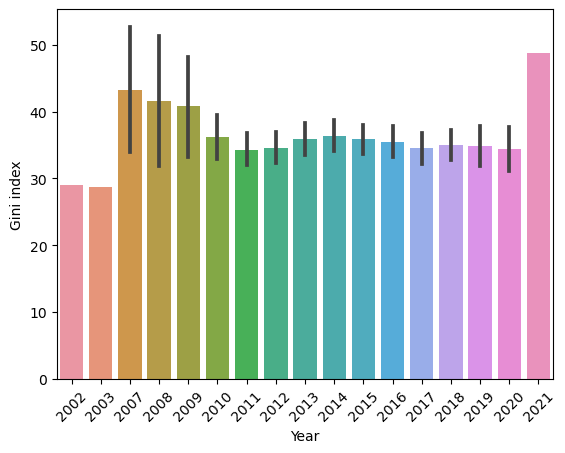

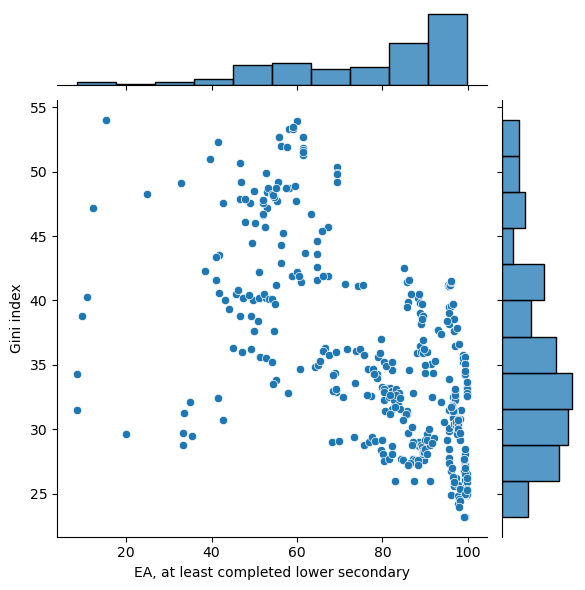

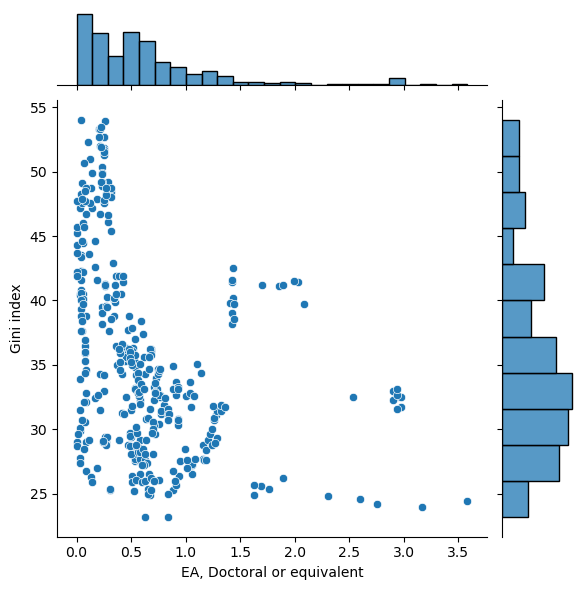

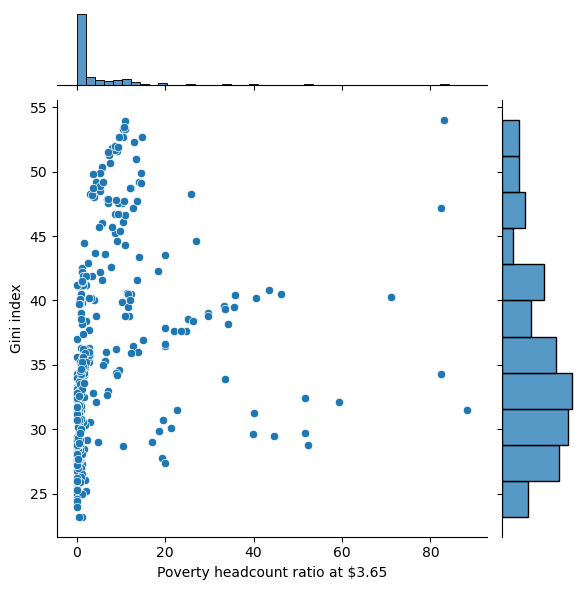

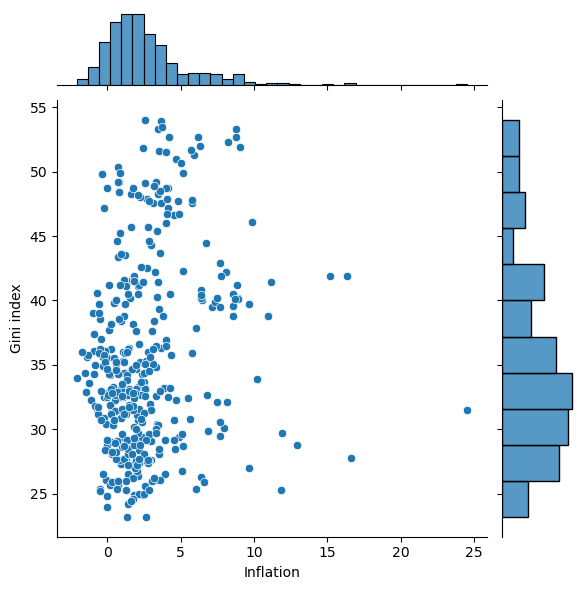

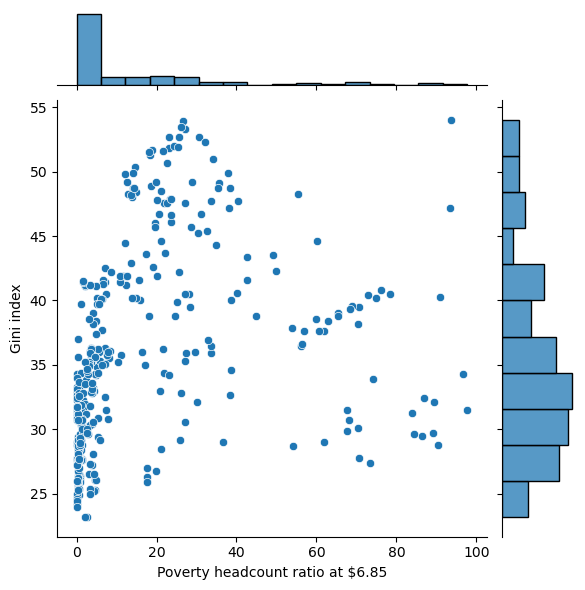

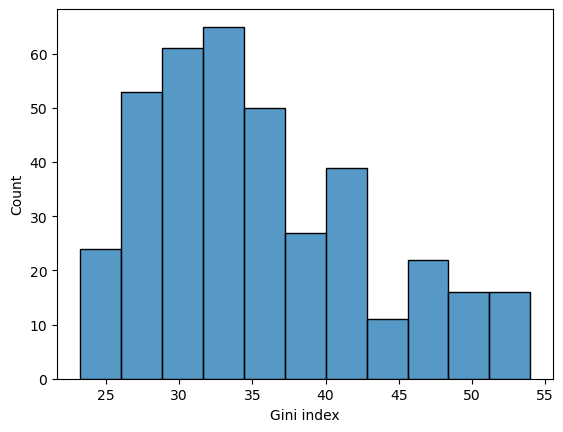

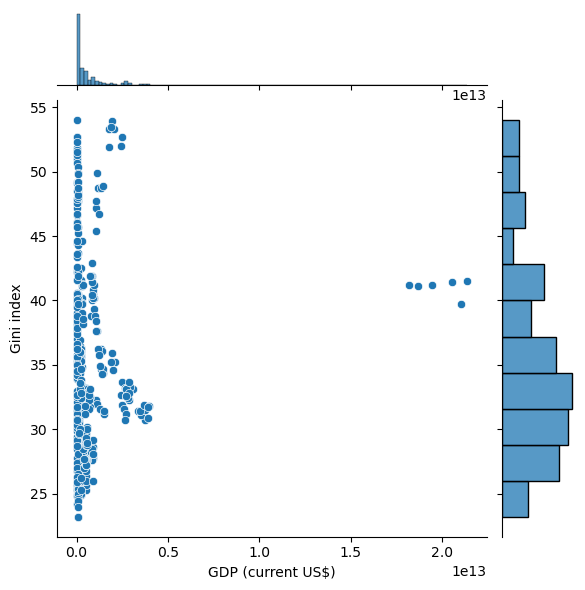

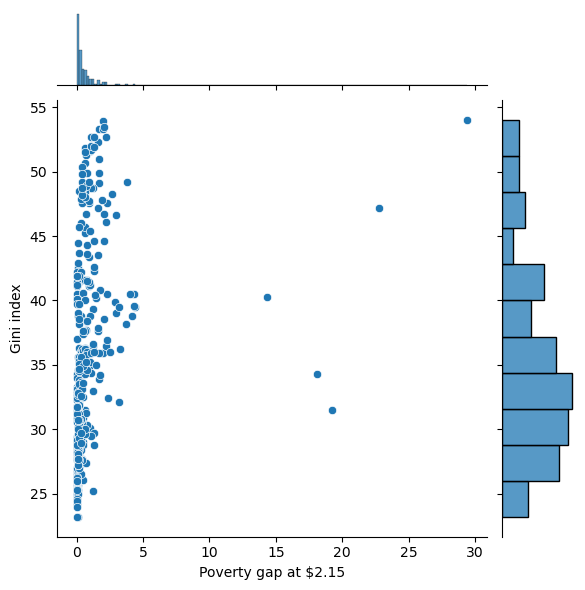

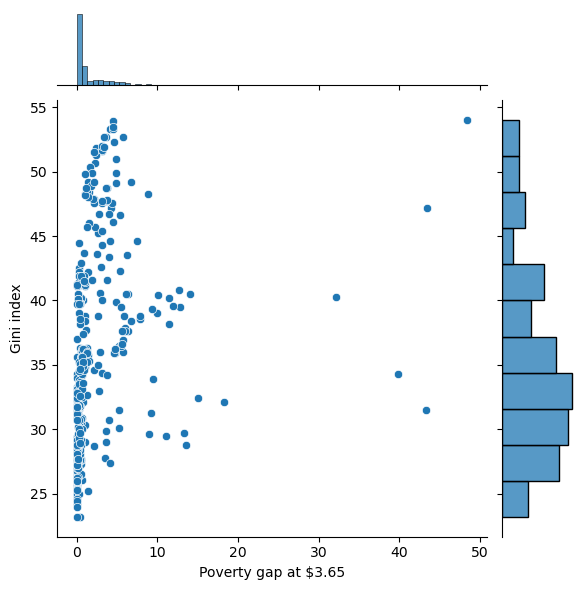

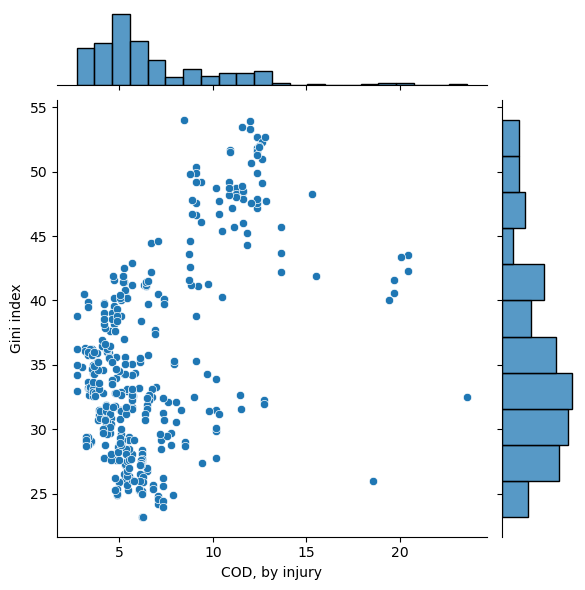

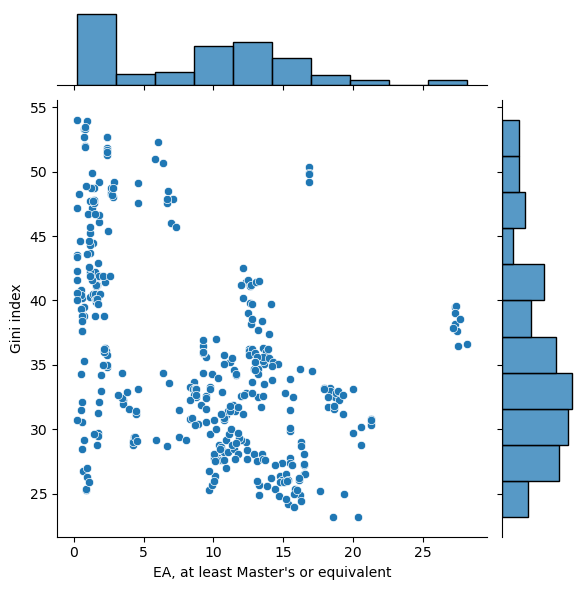

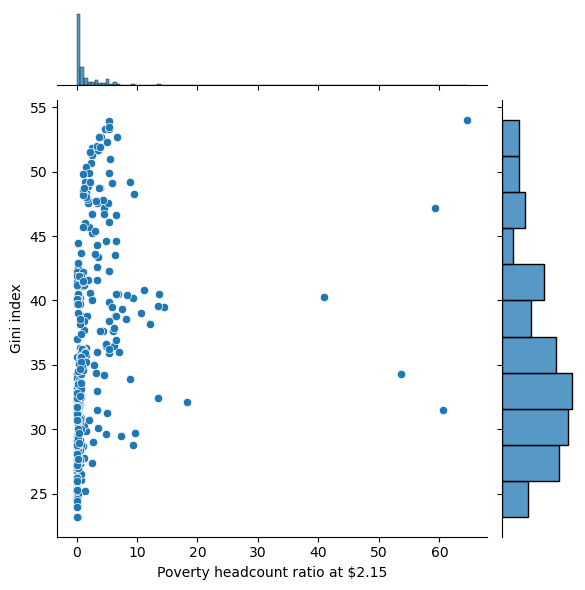

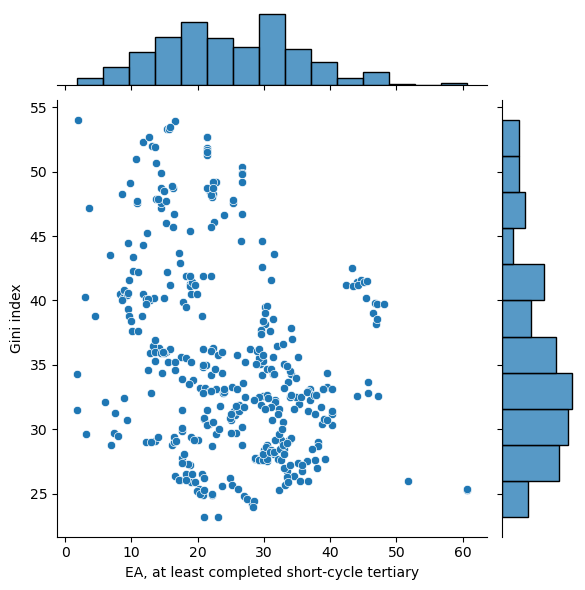

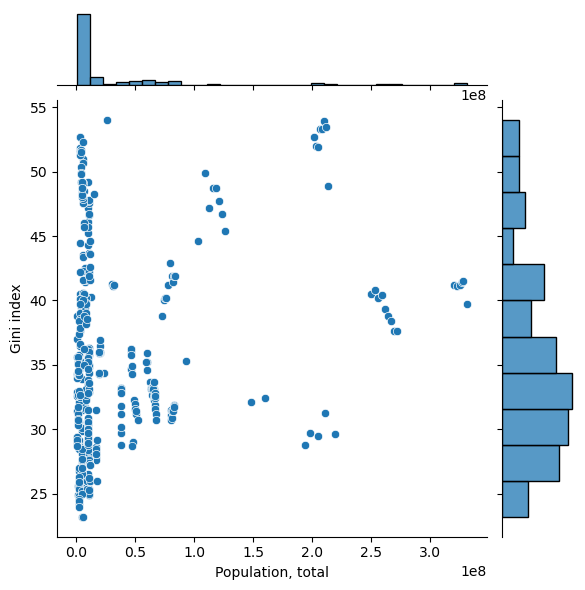

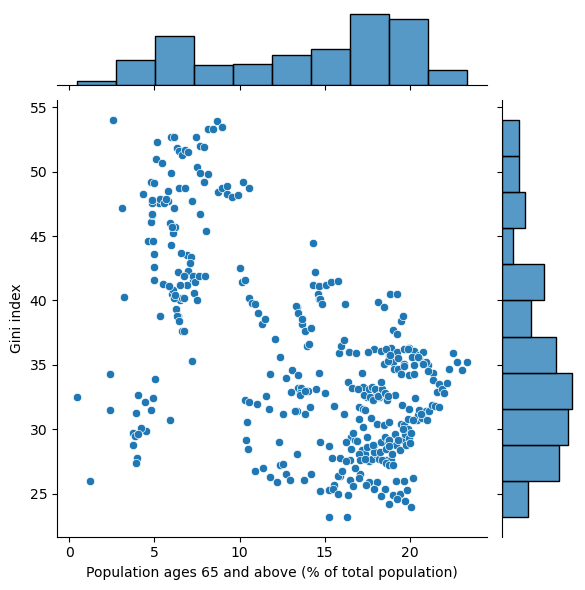

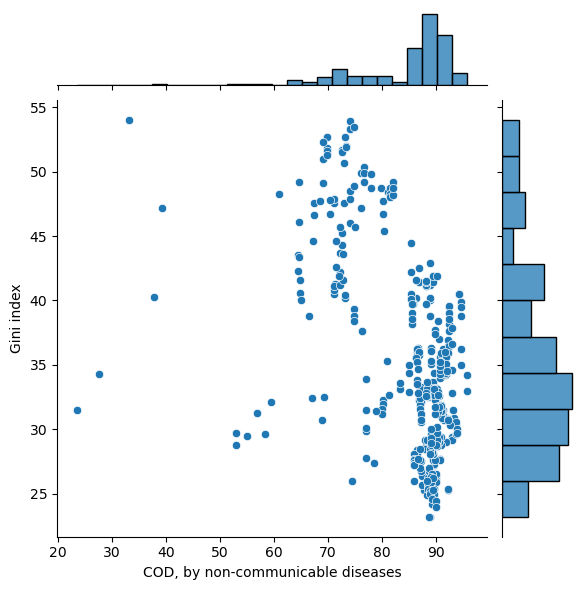

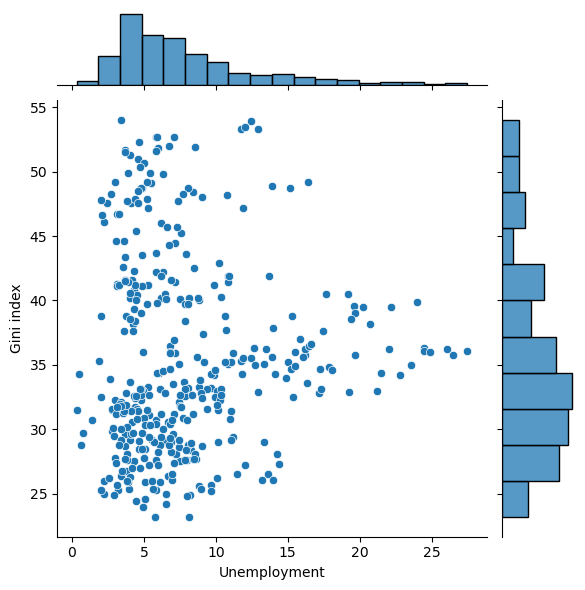

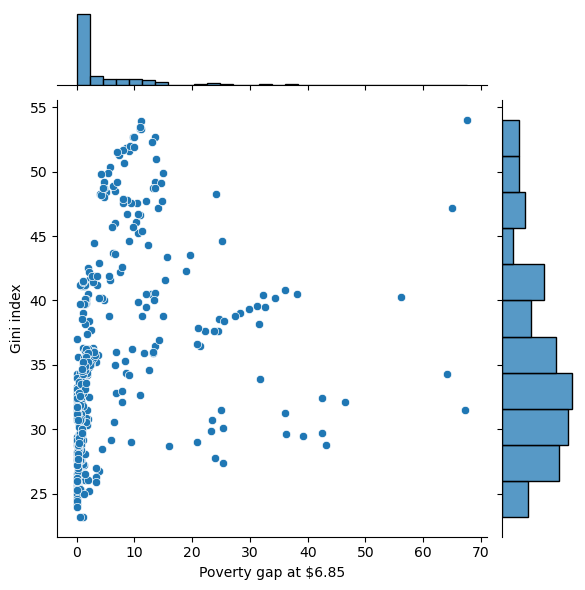

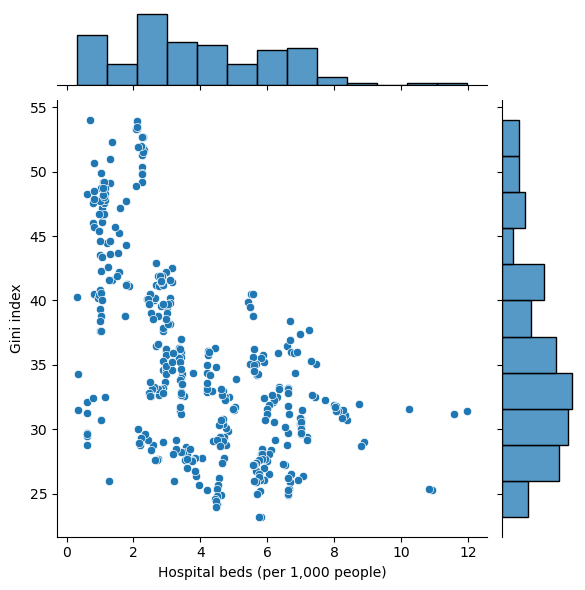

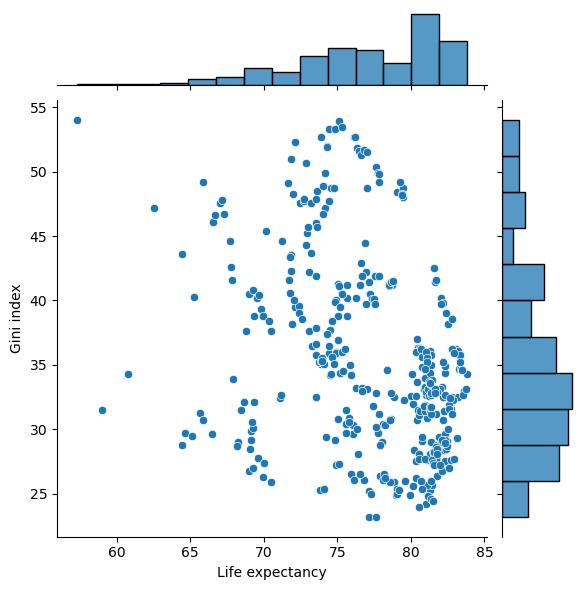

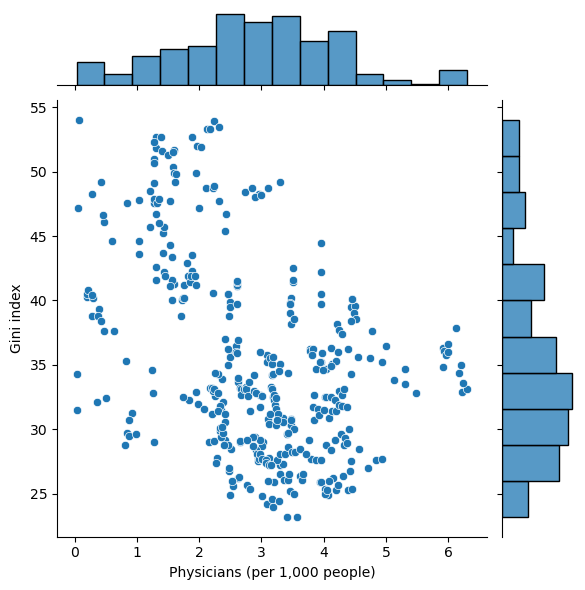

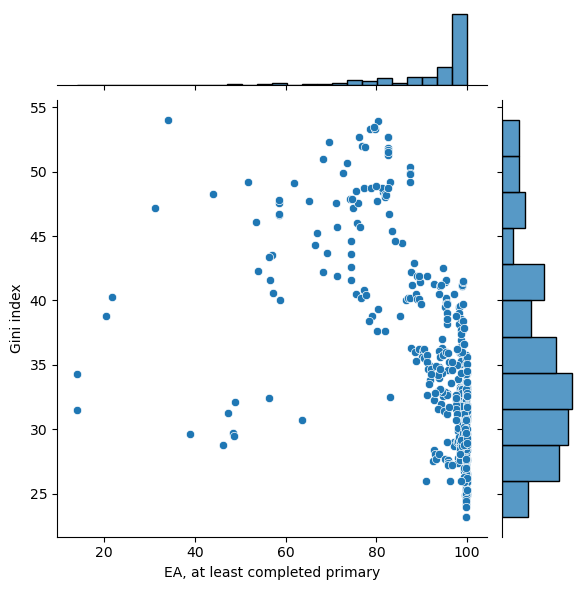

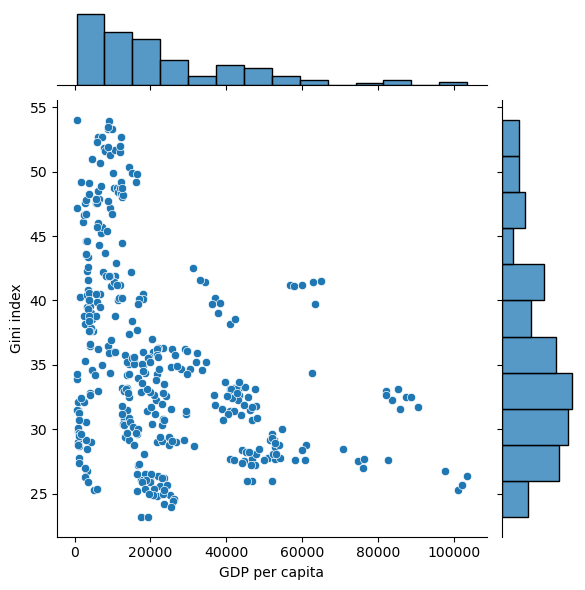

In [5]:
for col in df.columns:
    if col == 'Year':
        ax = sns.barplot(data=df,x=col,y='Gini index')
        plt.setp(ax.get_xticklabels(), rotation=45)
        plt.show()
    elif col == 'Gini index':
        sns.histplot(df[col]) 
    elif col != 'Country Name':
        sns.jointplot(data=df, x=col,y='Gini index')
        plt.show()

* correlations are at  *<span style='color:green;'>reports/figures/edacorr.xlsx</span>*
* Looking at the distributions and correlations it seems that the following features all have a similar strong negative relationship with gini index:
    * Hospital beds (per 1,000 people)
    * GDP per capita
    * Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative)
    * Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)
* The cause of death features both injury and non-communicable diseases also might be important features
* The poverty features are all mildly positively correlated with gini, heavily skewed right, and heavily correlated with each other
* Since the goal of this project is explanatory and not predictive, I'm going to now focus on removing multicollinearity so the effects of each feature can be seen seperately 

I'm going to start by using PCA to condense the poverty features

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
poverty = [col for col in df.columns if 'Poverty' in col]

poverty_pca = PCA().fit(scale(df[poverty]))

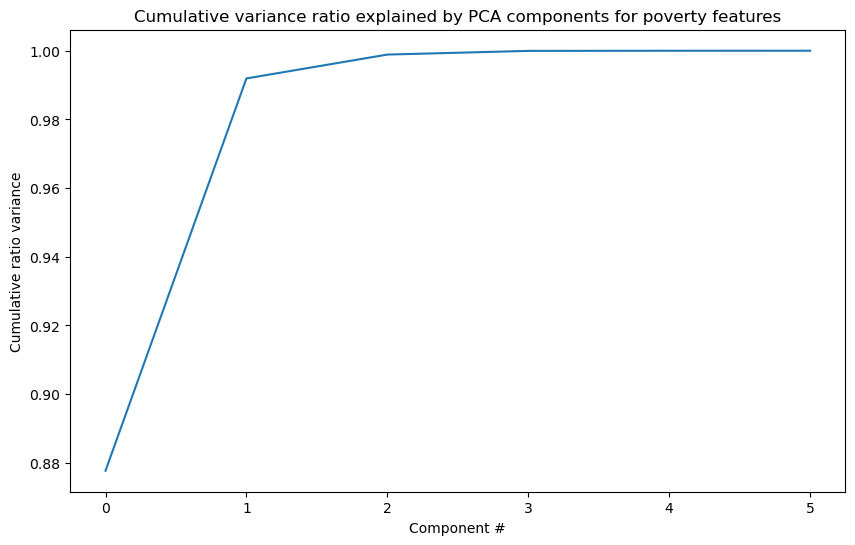

In [7]:
plt.subplots(figsize=(10, 6))
plt.plot(poverty_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for poverty features');

In [8]:
pd.DataFrame(poverty_pca.components_, columns=poverty)

,Poverty headcount ratio at $3.65,Poverty headcount ratio at $6.85,Poverty gap at $2.15,Poverty gap at $3.65,Poverty headcount ratio at $2.15,Poverty gap at $6.85
0,0.426287,0.375207,0.381395,0.430463,0.413010,0.419716
1,-0.205886,-0.597913,0.567385,0.176990,0.376608,-0.324078
2,-0.562645,0.562026,0.535469,-0.249967,-0.131718,-0.031573
3,-0.344028,0.243923,-0.457377,-0.038831,0.764284,-0.165273
4,-0.021179,-0.300573,0.085658,-0.654323,0.243616,0.643726
5,-0.583539,-0.189746,-0.171326,0.539673,-0.163590,0.525469


* All most all of the variance can be explained by the first 2 components
* The first component which accounts for 88% of the variance is very similar to just taking an average of all the poverty features and scaling by 0.4
* The second component, although it only represents 12% of the variance, is more interesting. It sees great negative representation from features at $6.85/day, great positive representation from features at $2.15/day, and close to zero with $3.65/day
* Next I'm going to look at the distribution and relationship of the second component

In [9]:
poverty_pca_x = poverty_pca.transform(scale(df[poverty]))
poverty_pca_x.shape

(384, 6)

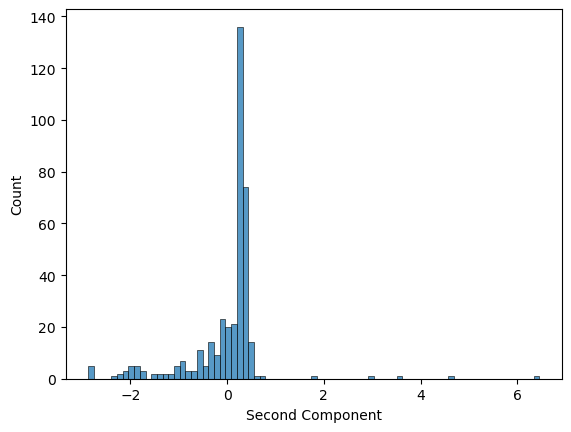

In [10]:
sns.histplot(poverty_pca_x[:,1])
plt.xlabel('Second Component');

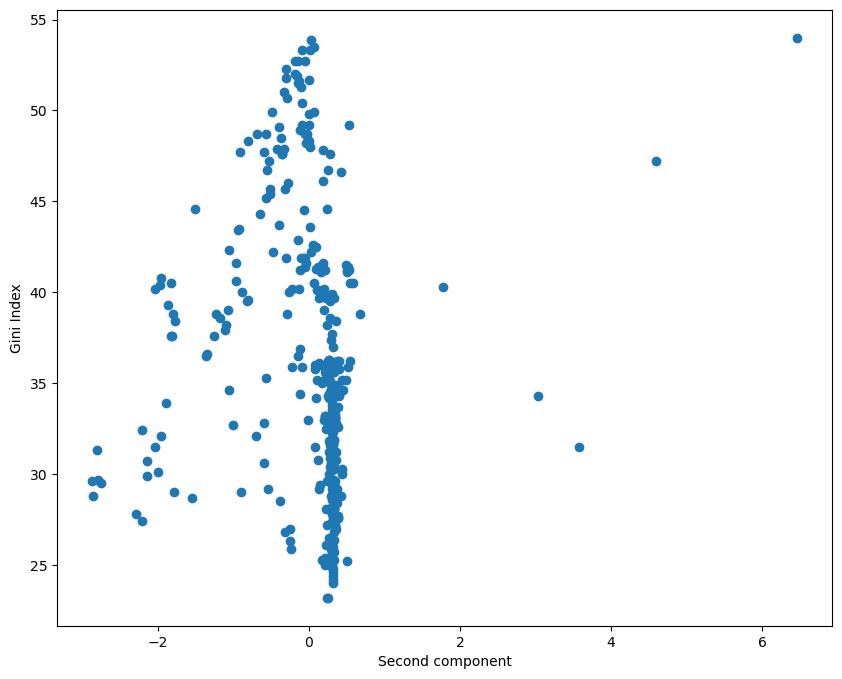

In [11]:
x = poverty_pca_x[:, 1]
y = df['Gini index']
#state = state_summary_index
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('Second component')
plt.ylabel('Gini Index');

* It seems like the second component measures the severity of poverty
* If the second component is positive, there's more people at the $2.15 level than at $6.85 and vice versa if negative.
* Although I don't see a any clear patterns in its relationship with Gini Index, I'll keep it as it might have insightful interactions with other features

In [12]:
df['poverty_pca0'] = poverty_pca_x[:, 0]
df['poverty_pca1'] = poverty_pca_x[:, 1]

df[poverty].to_csv('../data/interim/poverty_features.csv')
df = df.drop(poverty,axis=1)


Next, I'm going to use Variable Inflation Factor to measure multicollinearity
- I'll remove enough so that the Highest VIF is 5

In [13]:
from sklearn.linear_model import LinearRegression

features = df.drop(['Gini index','Country Name'],axis=1).columns.to_list()

def VIFs(features):
    VIFsd = {}
    for f in features:
        X = df[features].drop(f,axis=1)
        y = df[f]

        model = LinearRegression()
        model.fit(X,y)
        VIFsd[f] = 1/(1 - model.score(X,y))

    return pd.Series(VIFsd).sort_values(ascending=False)

VIFs(features)


EA, at least completed primary                          15.455327
COD, by non-communicable diseases                       14.094869
EA, at least completed lower secondary                  11.006638
Population ages 65 and above (% of total population)     7.618228
Life expectancy                                          7.085633
poverty_pca0                                             5.660961
GDP per capita                                           4.903818
Population, total                                        4.434867
Physicians (per 1,000 people)                            4.157070
GDP (current US$)                                        3.254441
COD, by injury                                           3.196568
Hospital beds (per 1,000 people)                         2.845530
EA, at least completed short-cycle tertiary              2.715888
EA, Doctoral or equivalent                               2.486565
poverty_pca1                                             2.480159
Unemployme

* Right now, there's 5 factors with VIFs that are too high
* After looking at the correlations, I determined that the top 3 are all highly correlated with each other and decided to only keep one
* I decided to keep 'Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)' as it had the lowest vif and the strongest correlation with gini index

In [14]:
VIFs(df.drop(['Gini index','Country Name','EA, at least completed primary','COD, by non-communicable diseases'],axis=1).columns.to_list())

Population ages 65 and above (% of total population)    7.076522
Life expectancy                                         5.864322
EA, at least completed lower secondary                  4.912049
GDP per capita                                          4.641631
Population, total                                       4.099680
poverty_pca0                                            3.819007
Physicians (per 1,000 people)                           3.787731
GDP (current US$)                                       3.185549
Hospital beds (per 1,000 people)                        2.835398
EA, at least completed short-cycle tertiary             2.662910
poverty_pca1                                            2.398581
COD, by injury                                          2.389728
EA, Doctoral or equivalent                              2.375394
EA, at least Master's or equivalent                     2.310451
Unemployment                                            2.053900
Inflation                

* Although Life expectancy and Population are both correlated with each other, removing one does not lower the other VIF below 5

In [15]:
VIFs(df.drop(['Gini index','Country Name','EA, at least completed primary','COD, by non-communicable diseases','Population ages 65 and above (% of total population)'],axis=1).columns.to_list())

Life expectancy                                5.678401
EA, at least completed lower secondary         4.838463
GDP per capita                                 4.621692
Population, total                              4.089580
poverty_pca0                                   3.805257
GDP (current US$)                              3.129192
Physicians (per 1,000 people)                  3.005473
Hospital beds (per 1,000 people)               2.448174
EA, Doctoral or equivalent                     2.375191
EA, at least completed short-cycle tertiary    2.366751
poverty_pca1                                   2.360366
EA, at least Master's or equivalent            2.310372
Unemployment                                   2.049820
COD, by injury                                 1.878139
Inflation                                      1.556618
Year                                           1.545326
dtype: float64

Life Expectancy is an important enough feature and 5.67 is close enough to 5 so I'll decide to keep it

These are the final features going into the model! I'll redo the principal components so that they're only fit on the training data.

Based on the correlations, I expect the health and education features to be the most significant. In particular
* Cause of death by injury
* Hospital beds per thousand people
* Childhood education indicators

In [16]:
df.drop(['EA, at least completed primary','COD, by non-communicable diseases','Population ages 65 and above (% of total population)','poverty_pca0','poverty_pca1'],axis=1).to_csv('../data/interim/selected_features.csv')